Gender: Female


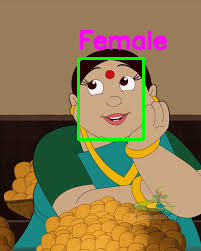

Gender prediction completed and displayed. ['Male', 'Female']


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def highlightFace(net, frame, conf_threshold=0.7):
    frameHeight, frameWidth = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    faceBoxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            faceBoxes.append([x1, y1, x2, y2])
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return frame, faceBoxes


# Paths to the model files
faceProto = "opencv_face_detector.pbtxt"
faceModel = "opencv_face_detector_uint8.pb"
genderProto = "gender_deploy.prototxt"
genderModel = "gender_net.caffemodel"

# Mean values and class labels
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
genderList = ['Male', 'Female']

# Load models
faceNet = cv2.dnn.readNet(faceModel, faceProto)
genderNet = cv2.dnn.readNet(genderModel, genderProto)

# Input image path
input_image_path = "/content/mausi.jfif"  # Replace with your image file path
# Read the image
frame = cv2.imread(input_image_path)
if frame is None:
    print("Error: Unable to read the input image.")
else:
    # Detect faces
    resultImg, faceBoxes = highlightFace(faceNet, frame)
    if not faceBoxes:
        print("No face detected.")
    else:
        for faceBox in faceBoxes:
            # Crop the face region
            face = frame[max(0, faceBox[1]):min(faceBox[3], frame.shape[0]-1),
                         max(0, faceBox[0]):min(faceBox[2], frame.shape[1]-1)]

            # Preprocess the face
            blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
            genderNet.setInput(blob)
            genderPreds = genderNet.forward()
            gender = genderList[genderPreds[0].argmax()]
            print(f"Gender: {gender}")

            # Annotate the image
            cv2.putText(resultImg, gender, (faceBox[0], faceBox[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 255), 2, cv2.LINE_AA)

        # Display the result
        cv2_imshow(resultImg)
        print("Gender prediction completed and displayed.")
